In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import STOPWORDS
import re

In [23]:
# Load dataset
df = pd.read_excel('tweet_with_predicted_aspect.xlsx', sheet_name='Sheet1')

# Rename kolom agar seragam
df.rename(columns={'Text Normalization': 'Tweet', 'Label_Bert': 'Sentiment', 'Predicted_Aspect': 'Aspect'}, inplace=True)


1. SENTIMENT DISTRIBUTION

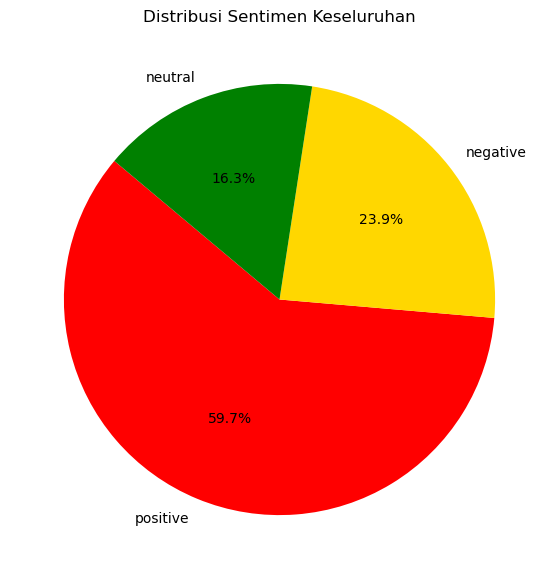

In [24]:
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'gold', 'green'])
plt.title('Distribusi Sentimen Keseluruhan')
plt.show()

2. TOP 5 WORDS PER ASPECT

In [25]:
# Function untuk membersihkan teks
def clean_text(text):
    text = re.sub(r'#\w+', '', str(text).lower())  # Hapus hashtag
    text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca
    return text

df['Clean_Text'] = df['Tweet'].apply(clean_text)

# Stopwords bahasa Indonesia (tambahan)
# Tambahkan daftar brand kamu di sini
brand_stopwords = {'fore', 'tomoro', 'kopi', 'kenangan', 'point', 'coffee', 'kenangancoffee', 'kopikenangan', 'pointcoffee','tuku','kopken','janjiw','famima','calf'}

stopwords = set(STOPWORDS)
additional_stopwords = {'ya','tapi','yang', 'dan', 'di', 'ke', 'dari', 'untuk', 'dengan', 'pada', 'ini', 'itu', 'atau','yg','aku','kalo','gak','gini','aja','aja','sih','si','kamu','kita','lu','lo','nya','sama','bisa','ada','juga','buat','nggak','kayak','soal','tuh','ada','kita', 'pake','ga','tp','mau','kak','nama'}
stopwords.update(additional_stopwords)
stopwords.update(brand_stopwords)

# Top 5 Kata per Aspek
top_words = {}

for aspect in df['Aspect'].unique():
    aspect_texts = df[df['Aspect'] == aspect]['Clean_Text']
    vectorizer = CountVectorizer(stop_words=list(stopwords))
    word_matrix = vectorizer.fit_transform(aspect_texts)
    word_sum = word_matrix.sum(axis=0)
    word_freq = [(word, word_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    sorted_words = sorted(word_freq, key=lambda x: x[1], reverse=True)[:5]
    top_words[aspect] = sorted_words

# Tampilkan Top 5 Kata per Aspek dalam Tabel
print("\nTop 5 Kata per Aspek:")
for aspect, words in top_words.items():
    print(f"\nAspect: {aspect}")
    for word, count in words:
        print(f"{word}: {count} kali")

# Top 5 kata per aspek tiap sentimen
top_words_sentiment = {}
for sentiment in df['Sentiment'].unique():
    sentiment_texts = df[df['Sentiment'] == sentiment]['Clean_Text']
    vectorizer = CountVectorizer(stop_words=list(stopwords))
    word_matrix = vectorizer.fit_transform(sentiment_texts)
    word_sum = word_matrix.sum(axis=0)
    word_freq = [(word, word_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    sorted_words = sorted(word_freq, key=lambda x: x[1], reverse=True)[:5]
    top_words_sentiment[sentiment] = sorted_words
# Tampilkan Top 5 Kata per Sentimen dalam Tabel
print("\nTop 5 Kata per Sentimen:")
for sentiment, words in top_words_sentiment.items():
    print(f"\nSentiment: {sentiment}")
    for word, count in words:
        print(f"{word}: {count} kali")




Top 5 Kata per Aspek:

Aspect: Produk
enak: 464 kali
banget: 238 kali
matcha: 237 kali
latte: 229 kali
suka: 189 kali

Aspect: Layanan
banget: 17 kali
iya: 14 kali
pas: 12 kali
pakai: 10 kali
deket: 7 kali

Aspect: Promosi
50: 27 kali
pakai: 24 kali
diskon: 24 kali
promo: 19 kali
beli: 17 kali

Top 5 Kata per Sentimen:

Sentiment: negative
iya: 49 kali
beli: 48 kali
minum: 42 kali
enak: 41 kali
banget: 38 kali

Sentiment: positive
enak: 431 kali
banget: 225 kali
latte: 218 kali
matcha: 201 kali
suka: 178 kali

Sentiment: neutral
beli: 21 kali
pakai: 15 kali
iya: 14 kali
butterscotch: 13 kali
50: 12 kali


c:\Users\atrke\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


3. ABSA (Pie Chart per Aspect)

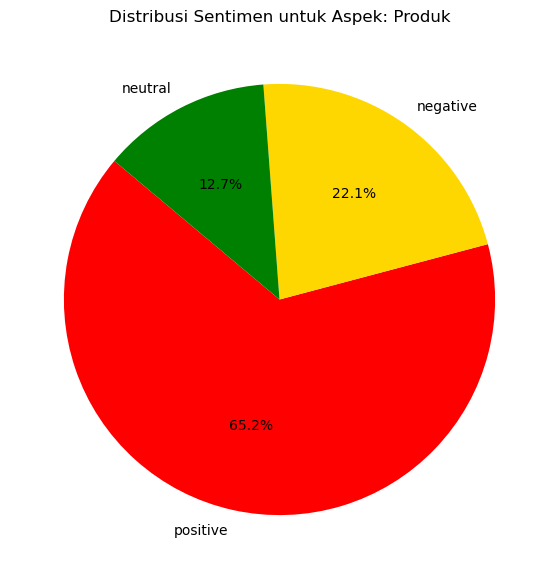

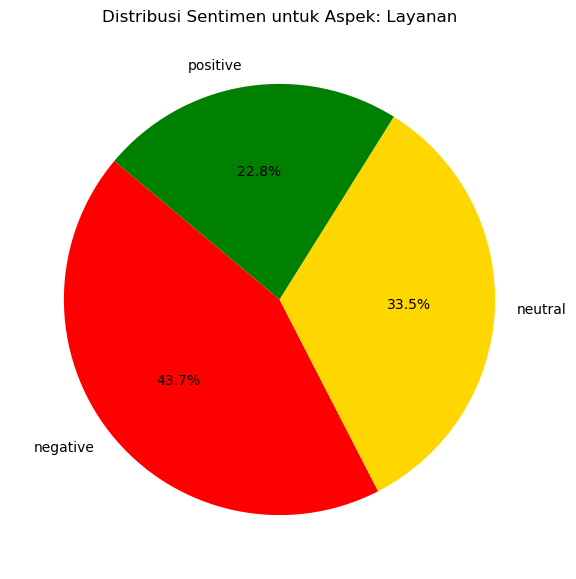

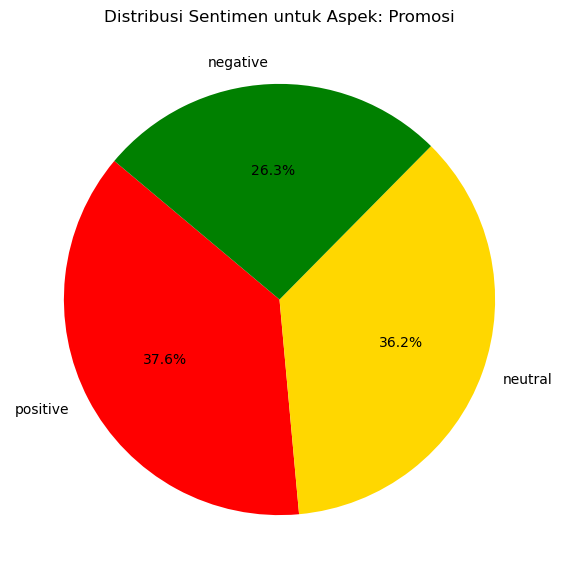

In [27]:

for aspect in df['Aspect'].unique():
    subset = df[df['Aspect'] == aspect]
    sentiment_counts = subset['Sentiment'].value_counts()

    plt.figure(figsize=(7, 7))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'gold', 'green'])
    plt.title(f'Distribusi Sentimen untuk Aspek: {aspect}')
    plt.show()